In [1]:
from imageio import imread
import os
from skimage.transform import resize
import cv2
import numpy as np
import pandas as pd

In [2]:
def load_and_flatten_image(imagePath, width, height):
    image = imread(imagePath)
    #small_image = resize(image, (11, 20))
    image_single_channel = image[:,:,0]
    small_image = cv2.resize(image_single_channel, (width, height))
    #small_image = image_single_channel
    image_array = small_image.flatten()
    return image_array

In [3]:
path = "classificatie"
width = 40
height = 22
cpt = sum([len(files) for r, d, files in os.walk(path)])
data_array = np.empty([cpt, height*width], dtype=np.uint8)
label_array = np.empty([cpt], dtype=np.str_)
counter = 0
for root, dirs, files in os.walk(path):
    for dirname in dirs:
        for root2, dirs2, files2 in os.walk(os.path.join(path, dirname)):
            for filename in files2:
                image = load_and_flatten_image(os.path.join(os.path.join(path, dirname), filename), width, height)
                for key, pixel in enumerate(image):
                    data_array[counter][key] = pixel
                label_array[counter] = dirname
                counter += 1

dataset = pd.DataFrame({'label': label_array, 'images': list(data_array)}, columns=['label', 'images'])
dataset.head()

,label,images
0,a,"[181, 115, 131, 138, 133, 125, 112, 95, 95, 17..."
1,a,"[180, 120, 131, 139, 133, 126, 110, 94, 98, 16..."
2,a,"[183, 110, 115, 112, 108, 112, 106, 94, 93, 20..."
3,a,"[184, 115, 118, 120, 113, 114, 111, 96, 95, 20..."
4,a,"[180, 113, 117, 113, 113, 112, 108, 93, 94, 20..."


In [4]:
for index in range(len(dataset)):
    int_value = "1" if dataset.loc[index,"label"] == "a" else "2" if dataset.loc[index,"label"] == "b" else "3"
    dataset.loc[index,"label"] = int_value
dataset.head()

,label,images
0,1,"[181, 115, 131, 138, 133, 125, 112, 95, 95, 17..."
1,1,"[180, 120, 131, 139, 133, 126, 110, 94, 98, 16..."
2,1,"[183, 110, 115, 112, 108, 112, 106, 94, 93, 20..."
3,1,"[184, 115, 118, 120, 113, 114, 111, 96, 95, 20..."
4,1,"[180, 113, 117, 113, 113, 112, 108, 93, 94, 20..."


In [5]:
dataset.label = dataset.label.astype(np.uint8)

In [6]:
dataset.label.info

<bound method Series.info of 0       1
1       1
2       1
3       1
4       1
       ..
2635    3
2636    3
2637    3
2638    3
2639    3
Name: label, Length: 2640, dtype: uint8>

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tel = 0
for train_index, test_index in split.split(dataset, dataset["label"]):
    tel += 1
    print(tel)
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

1


In [8]:
X_train, y_train = strat_train_set["images"], strat_train_set["label"]

In [9]:
y_train_n = (y_train == 1)

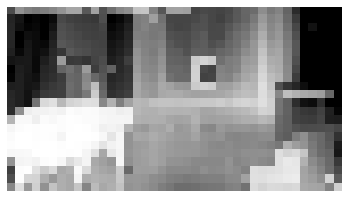

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
image = X_train[0]


some_digit_image = image.reshape(height, width)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()


In [11]:
X_train.describe()

count                                                  2112
unique                                                 2112
top       [168, 88, 99, 97, 84, 93, 95, 101, 100, 171, 9...
freq                                                      1
Name: images, dtype: object

In [12]:
y_train_n.describe()

count      2112
unique        2
top       False
freq       1430
Name: label, dtype: object

In [13]:
X_train_array = X_train.to_numpy()
X_train_array_exploded = np.zeros((len(X_train_array),width*height))
for idx, x in np.ndenumerate(X_train_array):
    for idy, y in np.ndenumerate(x):
        X_train_array_exploded[idx][idy] = y
X_train_array_exploded

array([[168.,  88.,  99., ..., 190., 157.,  98.],
       [165.,  91.,  96., ..., 185., 156.,  97.],
       [172.,  98., 108., ..., 140., 161.,  97.],
       ...,
       [180., 110., 122., ..., 123., 126.,  67.],
       [168.,  88.,  90., ..., 187., 149.,  98.],
       [163.,  77.,  89., ..., 168., 135.,  98.]])

In [14]:
y_train_n_array = y_train_n.to_numpy()
y_train_n_array

array([ True,  True, False, ..., False, False, False])

In [16]:


'''from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train_array_exploded, y_train_n_array)'''
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_array_exploded, y_train_n_array)

SGDClassifier(random_state=42)

In [17]:
X_test, y_test = strat_test_set["images"], strat_test_set["label"]
#some_image = X_test[0]
#some_image
#forest_reg.predict([some_image])
X_test

771     [164, 83, 92, 95, 82, 86, 93, 99, 106, 213, 98...
1466    [180, 109, 121, 113, 110, 113, 111, 98, 99, 17...
2063    [190, 132, 134, 142, 133, 127, 124, 122, 131, ...
2562    [190, 133, 134, 142, 133, 129, 103, 111, 117, ...
854     [181, 119, 133, 141, 133, 127, 111, 96, 99, 17...
                              ...                        
476     [179, 105, 116, 119, 121, 121, 89, 102, 106, 1...
1988    [178, 106, 117, 115, 117, 120, 83, 98, 98, 172...
2501    [190, 133, 134, 142, 133, 127, 86, 99, 101, 18...
206     [177, 107, 118, 121, 118, 122, 84, 97, 103, 10...
1077    [162, 82, 94, 94, 86, 91, 96, 99, 98, 172, 96,...
Name: images, Length: 528, dtype: object

In [18]:
X_test_array = X_test.to_numpy()
X_test_array_exploded = np.zeros((len(X_test_array),width*height))
for idx, x in np.ndenumerate(X_test_array):
    for idy, y in np.ndenumerate(x):
        X_test_array_exploded[idx][idy] = y
X_test_array_exploded

array([[164.,  83.,  92., ..., 184., 156.,  98.],
       [180., 109., 121., ..., 166., 166., 107.],
       [190., 132., 134., ..., 224., 232., 143.],
       ...,
       [190., 133., 134., ..., 167., 157.,  99.],
       [177., 107., 118., ..., 144., 155.,  97.],
       [162.,  82.,  94., ..., 186., 155.,  93.]])

In [19]:
some_image = X_test_array_exploded[0]
some_image
#forest_reg.predict([some_image])

array([164.,  83.,  92.,  95.,  82.,  86.,  93.,  99., 106., 213.,  98.,
        81.,  91.,  63.,  58.,  74.,  55., 133., 164.,  92.,  89.,  81.,
       161., 154., 160., 153., 153., 152., 145., 144., 143., 132., 189.,
       150., 128., 171., 159., 150., 143., 134., 180., 184., 182., 183.,
       178., 174., 189., 198., 200., 199., 202., 171., 127., 121., 121.,
       161., 109., 148., 139., 188., 180., 177., 168., 161., 167., 178.,
       175., 166., 165., 148., 143., 136., 196., 155., 143., 178., 166.,
       152., 146., 136., 186., 184., 187., 186., 182., 184., 188., 193.,
       196., 199., 204., 181., 129., 124., 126., 173., 115., 161., 145.,
       201., 204., 196., 176., 179., 192., 192., 184., 180., 177., 150.,
       151., 150., 200., 160., 154., 186.,  88., 165., 145., 142., 189.,
       189., 195., 191., 187., 184., 189., 193., 195., 200., 206., 194.,
       133., 128., 131., 189., 114., 167., 150., 201., 200., 205., 188.,
       179., 195., 204., 191., 192., 179., 157., 15

In [20]:
sgd_clf.predict([some_image])

array([ True])